In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib
matplotlib.use('Agg')

In [ ]:
import numpy as np
import data.mushroom.mushroom.fxns as mushroom_data
import auc_frl.auc_frl.fxns as fxns
import auc_frl.auc_frl.constructors as constructors
import pdb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import grid_search
import monotonic.monotonic.sklearn_wrappers as sklearn_wrappers
import BRL.RuleListClassifier as BRL

# define data
def get_data(raw_data_getter):
    data = raw_data_getter()
    state = np.random.get_state()
    np.random.seed(42)
    data = data.iloc[np.random.permutation(len(data)),:]
    np.random.set_state(state)
    x_names = data.columns[:-1].values
    xs, ys = data.iloc[:,:-1].values, data.iloc[:,-1].values
    print 'xs_shape:', xs.shape, 'positive_proportion:', np.mean(ys), 'xs_prop:', np.mean(xs, axis=0)
    return xs, ys, x_names

data_infos = [
#    (get_data(mushroom_data.spam_data),'spam'),
    (get_data(mushroom_data.mammo_data),'mammo'),
    (get_data(mushroom_data.spect_data),'spect'),
    (get_data(mushroom_data.vote_data),'vote'),
    (get_data(mushroom_data.haberman_data),'haberman'),
    (get_data(mushroom_data.breast_data),'breast'),
    (get_data(mushroom_data.cars_data),'cars'),
]

# define fitter_infos
fitter_infos = [(fxns.cv_fitter(
            [constructors.get_auc_fitter(supp, zmax, num_tries, lam, p, obj, lbs) 
             for supp in [5]
             for zmax in [2]
             for num_tries in [1000]
             for lam in [.001,.01,.1]
            ], 
            cv=lambda xs, ys, i: fxns.kfold_cv(3, xs, ys, i), 
            cv_iters=3, 
            loss=constructors.get_loss(p, obj)), 
                 'p=%d,obj=%s,lbs=%s' % (p,obj,lbs))
                for p in [1,2,4]#,4]#,8]
                for obj in ['pos','neg']
                for lbs in [['ideal']]
               ]
fitter_infos += [
        (BRL.RuleListClassifier(max_iter=10000, verbose=False), 'BRL'),
        (sklearn_wrappers.monotonic_sklearn_fitter(), 'FRL'),
        (grid_search.GridSearchCV(LogisticRegression(), {'C':np.exp2([-6,-4,-2,0,2,4,6]),}, cv = 3), 'Logreg'),
        (RandomForestClassifier(n_estimators=50),'RF',)
        ]

# define cv
cv = lambda xs, ys, i: fxns.sample_cv(sample_prop=0.5, xs=xs, ys=ys, i=i)

#
num_trials = 1

/Users/fultonw/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/fultonw/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/fultonw/Documents/projects/code/data/mushroom/mushroom/fxns.py:30: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, 

xs_shape: (961, 13) positive_proportion: 0.4630593132154006 xs_prop: [0.23309053 0.2226847  0.09989594 0.44432882 0.40062435 0.02601457
 0.12382934 0.30280957 0.14672216 0.04682622 0.76586889 0.40894901
 0.9094693 ]
xs_shape: (267, 22) positive_proportion: 0.7940074906367042 xs_prop: [0.44569288 0.24719101 0.39325843 0.28464419 0.40449438 0.23595506
 0.28464419 0.42696629 0.31086142 0.37827715 0.24344569 0.29588015
 0.49438202 0.30337079 0.17602996 0.31086142 0.1423221  0.13108614
 0.24719101 0.32209738 0.36329588 0.41198502]
xs_shape: (435, 16) positive_proportion: 0.6137931034482759 xs_prop: [0.42988506 0.44827586 0.5816092  0.40689655 0.48735632 0.62528736
 0.54942529 0.55632184 0.47586207 0.49655172 0.34482759 0.39310345
 0.48045977 0.57011494 0.4        0.6183908 ]
xs_shape: (306, 4) positive_proportion: 0.47058823529411764 xs_prop: [0.44444444 0.14052288 0.54248366 0.85947712]
xs_shape: (683, 27) positive_proportion: 0.34992679355783307 xs_prop: [0.54465593 0.26939971 0.18594436 

/Users/fultonw/Documents/projects/code/data/mushroom/mushroom/fxns.py:24: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  return pd.DataFrame.from_csv(constants.spect_data_file, index_col = None)
/Users/fultonw/Documents/projects/code/data/mushroom/mushroom/fxns.py:27: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  return pd.DataFrame.from_csv(constants.vote_data_file, index_col = None)
/Users/fultonw/Documents/projects/code/data/mushroom/mushroom/fxns.py:38: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your functi

0 p=1,obj=pos,lbs=['ideal']
['IrregularShape']


/Users/fultonw/Documents/projects/code/auc_frl/auc_frl/fxns.py:279: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  best_fitter = fitter_d[df.mean(axis=0).argmin()]


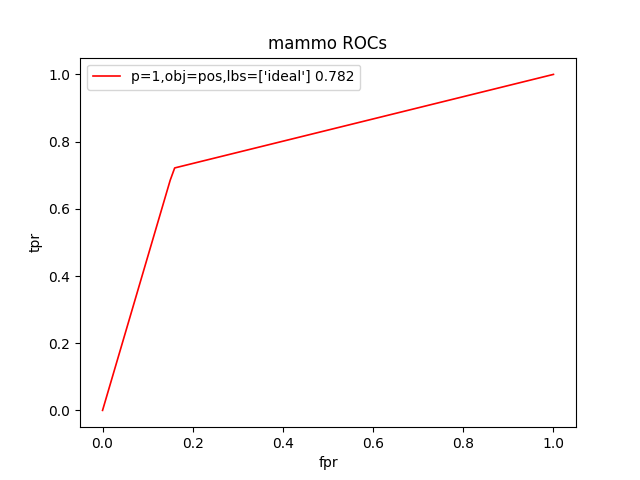

0 p=1,obj=neg,lbs=['ideal']
['Age_geq_60', 'Density_geq_2']_['Age_geq_60', 'IrregularShape']_['IrregularShape', 'Age_geq_45']_['IllDefinedMargin', 'Age_geq_45']_['IllDefinedMargin']_['IllDefinedMargin', 'IrregularShape']_['CircumscribedMargin', 'Age_geq_45']


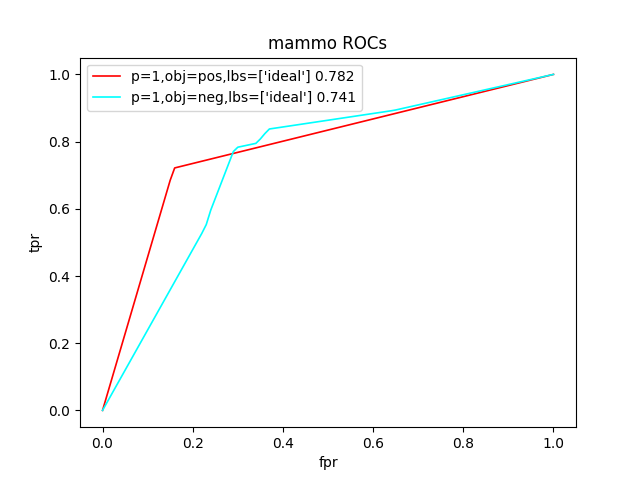

0 p=2,obj=pos,lbs=['ideal']
['Age_geq_60', 'IrregularShape']_['IrregularShape']


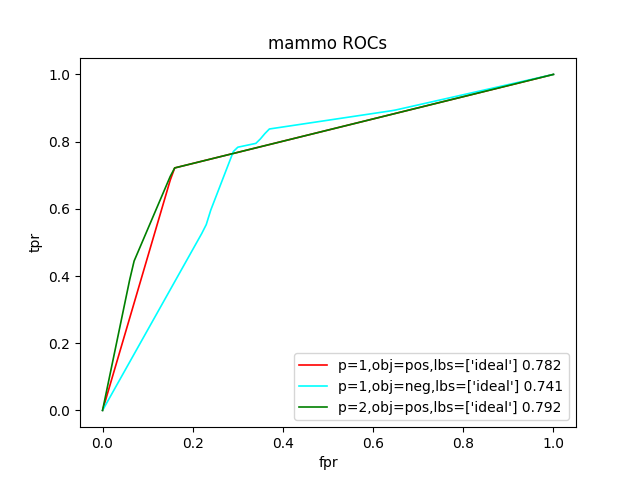

0 p=2,obj=neg,lbs=['ideal']
['Age_geq_60', 'Density_geq_2']_['Age_geq_60', 'IrregularShape']_['IrregularShape', 'Age_geq_45']_['IllDefinedMargin', 'Age_geq_45']_['IllDefinedMargin']_['IllDefinedMargin', 'IrregularShape']_['CircumscribedMargin', 'Age_geq_45']


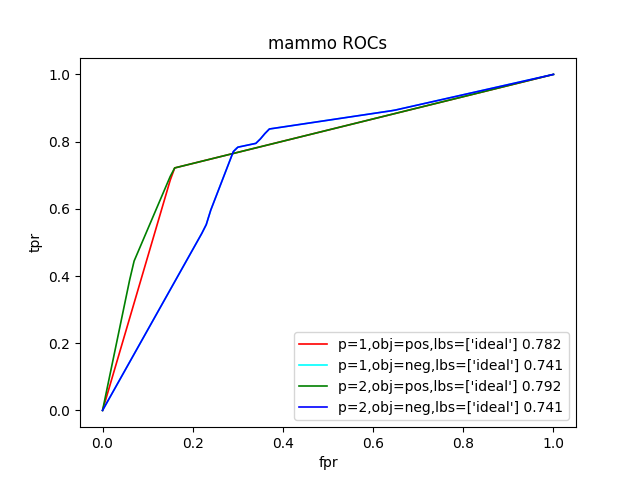

0 p=4,obj=pos,lbs=['ideal']
['Age_geq_60', 'IrregularShape']_['IrregularShape', 'Density_geq_2']


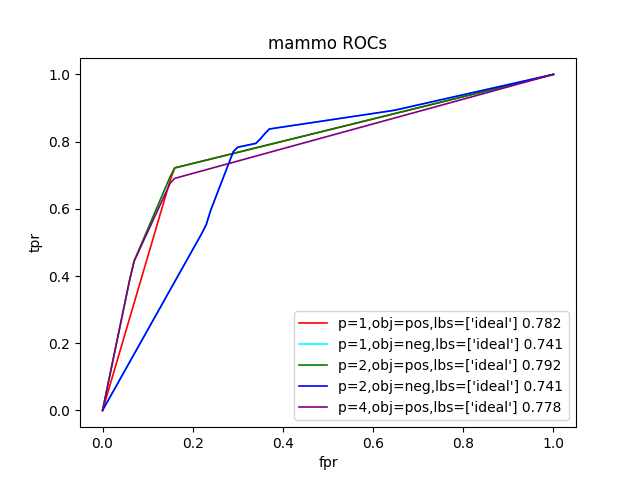

0 p=4,obj=neg,lbs=['ideal']
['Age_geq_60', 'IrregularShape']_['IrregularShape']


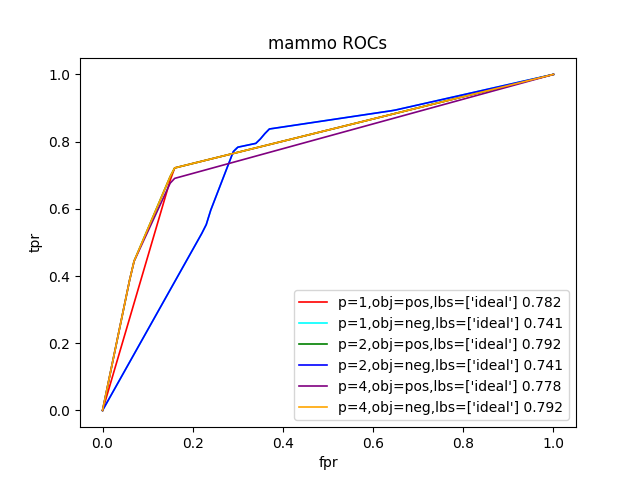

0 BRL
Trained RuleListClassifier 
IF CircumscribedMargin : 0.5_to_inf THEN probability of class 1: 12.2% (7.8%-17.3%)
ELSE IF Age_geq_60 : 0.5_to_inf THEN probability of class 1: 84.0% (77.8%-89.3%)
ELSE IF IrregularShape : -inf_to_0.5 THEN probability of class 1: 27.5% (15.0%-42.1%)
ELSE IF ObscuredMargin : All THEN probability of class 1: 63.1% (53.9%-71.8%)
ELSE probability of class 1: 50.0% (2.5%-97.5%)



/Users/fultonw/Documents/modules/BRL/Discretization/MDLP.py:53: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  self._data = self._data.convert_objects(convert_numeric=True)


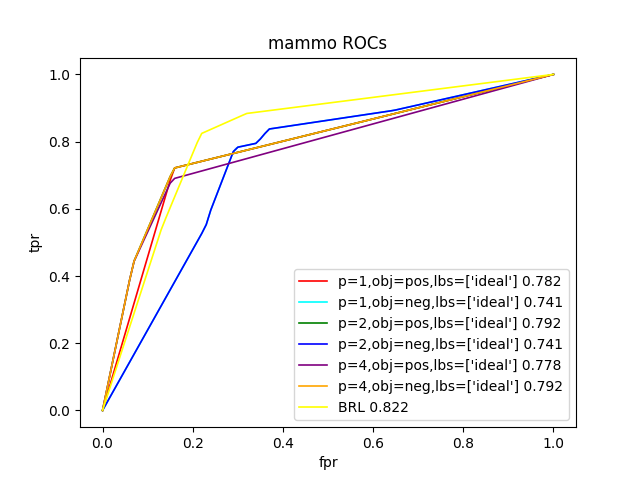

0 FRL
[['ObscuredMargin', 'Density_geq_2'], ['IrregularShape', 'Age_geq_45']]


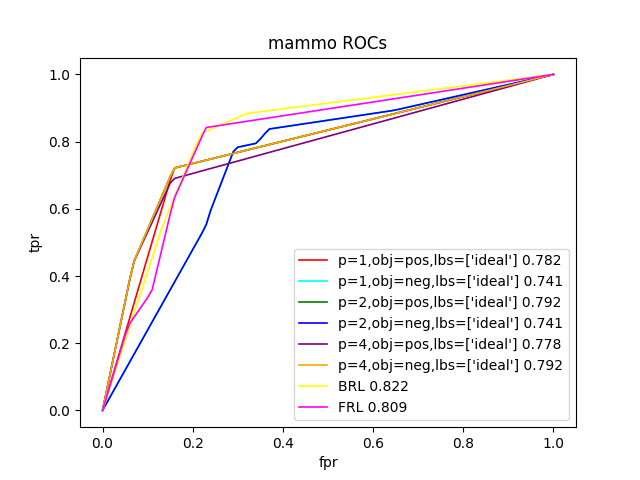

0 Logreg
GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([1.5625e-02, 6.2500e-02, 2.5000e-01, 1.0000e+00, 4.0000e+00,
       1.6000e+01, 6.4000e+01])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)


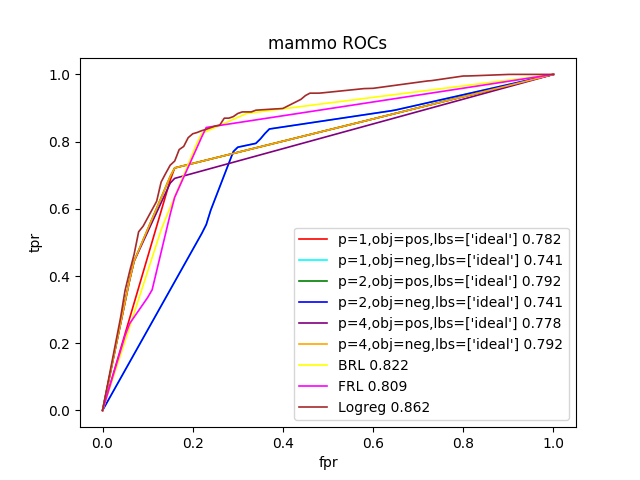

0 RF
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


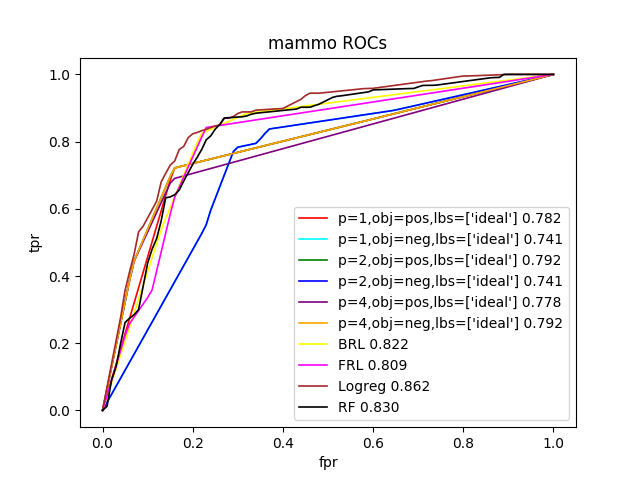

,mammo
"p=1,obj=pos,lbs=['ideal']",8.029140
"p=1,obj=neg,lbs=['ideal']",4.879838
"p=2,obj=pos,lbs=['ideal']",7.782784
"p=2,obj=neg,lbs=['ideal']",5.139841
"p=4,obj=pos,lbs=['ideal']",6.685508
"p=4,obj=neg,lbs=['ideal']",4.567150
BRL,8.681021
FRL,17.864606
Logreg,0.062731
RF,0.227750


0 p=1,obj=pos,lbs=['ideal']
['F16']_['F13']


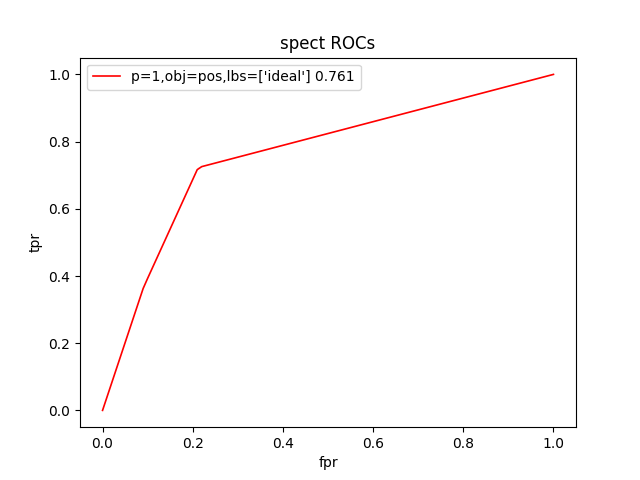

In [ ]:
import auc_frl_run.auc_frl_run.notebooks.CV.run as run
run.run(num_trials, fitter_infos, cv, data_infos)